In [6]:
#imports
import numpy as np
import pandas as pd
import io
from google.colab import files
import time
import heapq
import random
import matplotlib.pyplot as plt
from statistics import mean
from collections import deque

In [7]:
#uploading csv
uploaded = files.upload()

Saving flight_data.csv to flight_data.csv


In [8]:
#csv to pandas df
flight_data = pd.read_csv(io.BytesIO(uploaded['flight_data.csv']))

<ipython-input-8-93f16ee5fd8b>:2: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  flight_data = pd.read_csv(io.BytesIO(uploaded['flight_data.csv']))


In [9]:
flight_data

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245950,Table1a,2024,1,35412,31703,"Knoxville, TN","New York City, NY (Metropolitan Area)",15412,12953,TYS,...,278.70,DL,0.7503,287.44,AA,0.2359,248.46,NaN,NaN,202411541212953TYSLGA
245951,Table1a,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,11697,TYS,...,148.69,G4,0.8255,114.45,G4,0.8255,114.45,NaN,NaN,202411541211697TYSFLL
245952,Table1a,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,13303,TYS,...,330.19,AA,0.8057,321.92,AA,0.8057,321.92,NaN,NaN,202411541213303TYSMIA
245953,Table1a,2024,1,35412,33195,"Knoxville, TN","Tampa, FL (Metropolitan Area)",15412,14112,TYS,...,95.65,G4,1.0000,95.65,G4,1.0000,95.65,NaN,NaN,202411541214112TYSPIE


In [10]:
#dropping unneccessary columns
flight_data = flight_data.drop(['tbl', 'citymarketid_1','citymarketid_2', 'airportid_1', 'airportid_2', 'large_ms', 'Geocoded_City1', 'Geocoded_City2'
, 'tbl1apk', 'lf_ms'],axis=1)

In [11]:
flight_data

,Year,quarter,city1,city2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,fare_lg,carrier_low,fare_low
0,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",ABE,PIE,970,180,81.43,G4,81.43,G4,81.43
1,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",ABE,TPA,970,19,208.93,DL,219.98,UA,154.11
2,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",ABQ,DAL,580,204,184.56,WN,184.44,WN,184.44
3,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",ABQ,DFW,580,264,182.64,AA,183.09,AA,183.09
4,2021,3,"Albuquerque, NM","Phoenix, AZ",ABQ,PHX,328,398,177.11,WN,184.49,AA,165.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245950,2024,1,"Knoxville, TN","New York City, NY (Metropolitan Area)",TYS,LGA,665,207,278.70,DL,287.44,AA,248.46
245951,2024,1,"Knoxville, TN","Miami, FL (Metropolitan Area)",TYS,FLL,724,277,148.69,G4,114.45,G4,114.45
245952,2024,1,"Knoxville, TN","Miami, FL (Metropolitan Area)",TYS,MIA,724,70,330.19,AA,321.92,AA,321.92
245953,2024,1,"Knoxville, TN","Tampa, FL (Metropolitan Area)",TYS,PIE,550,178,95.65,G4,95.65,G4,95.65


In [12]:
#removing years before 2018
flight_data = flight_data[flight_data['Year']>2017]
flight_data.dropna()
flight_data

,Year,quarter,city1,city2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,fare_lg,carrier_low,fare_low
0,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",ABE,PIE,970,180,81.43,G4,81.43,G4,81.43
1,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",ABE,TPA,970,19,208.93,DL,219.98,UA,154.11
2,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",ABQ,DAL,580,204,184.56,WN,184.44,WN,184.44
3,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",ABQ,DFW,580,264,182.64,AA,183.09,AA,183.09
4,2021,3,"Albuquerque, NM","Phoenix, AZ",ABQ,PHX,328,398,177.11,WN,184.49,AA,165.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245950,2024,1,"Knoxville, TN","New York City, NY (Metropolitan Area)",TYS,LGA,665,207,278.70,DL,287.44,AA,248.46
245951,2024,1,"Knoxville, TN","Miami, FL (Metropolitan Area)",TYS,FLL,724,277,148.69,G4,114.45,G4,114.45
245952,2024,1,"Knoxville, TN","Miami, FL (Metropolitan Area)",TYS,MIA,724,70,330.19,AA,321.92,AA,321.92
245953,2024,1,"Knoxville, TN","Tampa, FL (Metropolitan Area)",TYS,PIE,550,178,95.65,G4,95.65,G4,95.65


In [13]:
#reordering columns
cols = list(flight_data.columns.values)
cols
cols = ['Year','airport_1','airport_2','fare', 'nsmiles', 'carrier_lg', 'fare_lg', 'carrier_low', 'fare_low', 'city1', 'city2', 'passengers', 'quarter']
flight_data= flight_data[cols]
flight_data

,Year,airport_1,airport_2,fare,nsmiles,carrier_lg,fare_lg,carrier_low,fare_low,city1,city2,passengers,quarter
0,2021,ABE,PIE,81.43,970,G4,81.43,G4,81.43,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",180,3
1,2021,ABE,TPA,208.93,970,DL,219.98,UA,154.11,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",19,3
2,2021,ABQ,DAL,184.56,580,WN,184.44,WN,184.44,"Albuquerque, NM","Dallas/Fort Worth, TX",204,3
3,2021,ABQ,DFW,182.64,580,AA,183.09,AA,183.09,"Albuquerque, NM","Dallas/Fort Worth, TX",264,3
4,2021,ABQ,PHX,177.11,328,WN,184.49,AA,165.77,"Albuquerque, NM","Phoenix, AZ",398,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245950,2024,TYS,LGA,278.70,665,DL,287.44,AA,248.46,"Knoxville, TN","New York City, NY (Metropolitan Area)",207,1
245951,2024,TYS,FLL,148.69,724,G4,114.45,G4,114.45,"Knoxville, TN","Miami, FL (Metropolitan Area)",277,1
245952,2024,TYS,MIA,330.19,724,AA,321.92,AA,321.92,"Knoxville, TN","Miami, FL (Metropolitan Area)",70,1
245953,2024,TYS,PIE,95.65,550,G4,95.65,G4,95.65,"Knoxville, TN","Tampa, FL (Metropolitan Area)",178,1


In [14]:
airports = flight_data['airport_1'].tolist() + flight_data['airport_2'].tolist()
len(airports),len(set(airports))
#176 unique airports found

(98246, 176)

In [15]:
#reverse all routes and add back to original data
copy = flight_data.copy()
copy1 = flight_data.copy()
col_list = list(copy1)
#swap position of airport_1 and airport_2 column
col_list[1], col_list[2] = col_list[2], col_list[1]
copy.columns = col_list
#swap airport_1 and airport_2 column headers to swap data in columns
cols = ['Year','airport_1','airport_2','fare', 'nsmiles', 'carrier_lg', 'fare_lg', 'carrier_low', 'fare_low', 'city1', 'city2', 'passengers', 'quarter']
copy = copy[cols]
flight_data = pd.concat([copy,copy1])
flight_data

,Year,airport_1,airport_2,fare,nsmiles,carrier_lg,fare_lg,carrier_low,fare_low,city1,city2,passengers,quarter
0,2021,PIE,ABE,81.43,970,G4,81.43,G4,81.43,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",180,3
1,2021,TPA,ABE,208.93,970,DL,219.98,UA,154.11,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",19,3
2,2021,DAL,ABQ,184.56,580,WN,184.44,WN,184.44,"Albuquerque, NM","Dallas/Fort Worth, TX",204,3
3,2021,DFW,ABQ,182.64,580,AA,183.09,AA,183.09,"Albuquerque, NM","Dallas/Fort Worth, TX",264,3
4,2021,PHX,ABQ,177.11,328,WN,184.49,AA,165.77,"Albuquerque, NM","Phoenix, AZ",398,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245950,2024,TYS,LGA,278.70,665,DL,287.44,AA,248.46,"Knoxville, TN","New York City, NY (Metropolitan Area)",207,1
245951,2024,TYS,FLL,148.69,724,G4,114.45,G4,114.45,"Knoxville, TN","Miami, FL (Metropolitan Area)",277,1
245952,2024,TYS,MIA,330.19,724,AA,321.92,AA,321.92,"Knoxville, TN","Miami, FL (Metropolitan Area)",70,1
245953,2024,TYS,PIE,95.65,550,G4,95.65,G4,95.65,"Knoxville, TN","Tampa, FL (Metropolitan Area)",178,1


In [16]:
#merging rows with identical routes
flight_data= flight_data.groupby(['airport_1', 'airport_2'], ).agg({'fare': 'mean', 'nsmiles':'mean', 'carrier_lg': 'first', 'fare_lg': 'mean',
                                                                     'carrier_low': 'first', 'fare_low': 'mean', 'city1': 'first', 'city2': 'first'}).reset_index()

In [17]:
#creating graph
graph_dict = {}
#iterate through every route
for index, row in flight_data.iterrows():
  #add airport_2 to adjacency of airport_1
  if row['airport_1'] not in graph_dict.keys():
    graph_dict[row['airport_1']] = [row['airport_2']]
  else:
    graph_dict[row['airport_1']].append(row['airport_2'])
graph_dict

{'ABE': ['PIE', 'TPA'],
 'ABQ': ['BOS',
  'BUR',
  'BWI',
  'DAL',
  'DCA',
  'DFW',
  'EWR',
  'HOU',
  'HPN',
  'IAD',
  'IAH',
  'ISP',
  'JFK',
  'LAX',
  'LGA',
  'LGB',
  'MDW',
  'MHT',
  'OAK',
  'ONT',
  'ORD',
  'PHX',
  'PVD',
  'SFO',
  'SJC',
  'SNA',
  'SWF'],
 'ACK': ['DCA', 'EWR', 'HPN', 'IAD', 'JFK', 'LGA'],
 'ACV': ['BUR', 'LAX', 'ONT', 'SNA'],
 'ACY': ['FLL', 'MIA', 'TPA'],
 'ALB': ['BUR',
  'BWI',
  'DCA',
  'FLL',
  'IAD',
  'LAX',
  'LGB',
  'MDW',
  'MIA',
  'OAK',
  'ONT',
  'ORD',
  'PIE',
  'SFO',
  'SJC',
  'SNA',
  'TPA'],
 'AMA': ['DAL', 'DFW', 'HOU', 'IAH'],
 'ASE': ['BUR',
  'DFW',
  'EWR',
  'FLL',
  'HPN',
  'JFK',
  'LAX',
  'LGA',
  'LGB',
  'MIA',
  'ONT',
  'ORD',
  'SNA'],
 'ATL': ['BOS',
  'BUR',
  'BWI',
  'CAK',
  'CLE',
  'CMH',
  'DAL',
  'DCA',
  'DFW',
  'EWR',
  'FLL',
  'HOU',
  'HPN',
  'IAD',
  'IAH',
  'ISP',
  'JFK',
  'LAX',
  'LGA',
  'LGB',
  'MDW',
  'MHT',
  'MIA',
  'OAK',
  'ONT',
  'ORD',
  'ORF',
  'PHF',
  'PHX',
  'PVD',
  '

In [18]:
#creating weighted graph, same as before with weights
weighted_graph_dict = {}
for index, row in flight_data.iterrows():
  if row['airport_1'] not in weighted_graph_dict.keys():
    #add airport_2 and weight to adjacency of airport_1
    weighted_graph_dict[row['airport_1']] = {row['airport_2'] : row['fare']}
  else:
    weighted_graph_dict[row['airport_1']][row['airport_2']] = row['fare']
weighted_graph_dict

{'ABE': {'PIE': 98.045, 'TPA': 273.848},
 'ABQ': {'BOS': 310.6111111111111,
  'BUR': 188.516,
  'BWI': 271.274,
  'DAL': 189.438,
  'DCA': 295.21479999999997,
  'DFW': 219.4068,
  'EWR': 305.28333333333336,
  'HOU': 220.192,
  'HPN': 309.1563636363636,
  'IAD': 324.23400000000004,
  'IAH': 252.07080000000002,
  'ISP': 282.75375,
  'JFK': 229.3345833333333,
  'LAX': 175.3364,
  'LGA': 254.04333333333332,
  'LGB': 184.774,
  'MDW': 235.94541666666666,
  'MHT': 297.6377777777777,
  'OAK': 198.49759999999998,
  'ONT': 205.81760000000003,
  'ORD': 267.5566666666667,
  'PHX': 165.9048,
  'PVD': 311.50666666666666,
  'SFO': 221.8044,
  'SJC': 209.3416,
  'SNA': 206.21880000000002,
  'SWF': 330.7966666666667},
 'ACK': {'DCA': 181.03,
  'EWR': 207.91222222222223,
  'HPN': 183.53714285714287,
  'IAD': 199.93,
  'JFK': 182.37444444444444,
  'LGA': 177.85555555555555},
 'ACV': {'BUR': 125.08, 'LAX': 208.64, 'ONT': 291.98, 'SNA': 282.91},
 'ACY': {'FLL': 99.55199999999999,
  'MIA': 161.333333333333

In [19]:
#creating weighted graph, with a constant added to the weights
layover_graph_dict = {}
layover_cost = 80
for index, row in flight_data.iterrows():
  if row['airport_1'] not in layover_graph_dict.keys():
    #add airport_2 and weight to adjacency of airport_1
    layover_graph_dict[row['airport_1']] = {row['airport_2'] : row['fare']+layover_cost}
  else:
    layover_graph_dict[row['airport_1']][row['airport_2']] = row['fare']+layover_cost
layover_graph_dict

{'ABE': {'PIE': 178.04500000000002, 'TPA': 353.848},
 'ABQ': {'BOS': 390.6111111111111,
  'BUR': 268.51599999999996,
  'BWI': 351.274,
  'DAL': 269.438,
  'DCA': 375.21479999999997,
  'DFW': 299.4068,
  'EWR': 385.28333333333336,
  'HOU': 300.192,
  'HPN': 389.1563636363636,
  'IAD': 404.23400000000004,
  'IAH': 332.0708,
  'ISP': 362.75375,
  'JFK': 309.3345833333333,
  'LAX': 255.3364,
  'LGA': 334.0433333333333,
  'LGB': 264.774,
  'MDW': 315.9454166666667,
  'MHT': 377.6377777777777,
  'OAK': 278.4976,
  'ONT': 285.8176,
  'ORD': 347.5566666666667,
  'PHX': 245.9048,
  'PVD': 391.50666666666666,
  'SFO': 301.8044,
  'SJC': 289.34159999999997,
  'SNA': 286.2188,
  'SWF': 410.7966666666667},
 'ACK': {'DCA': 261.03,
  'EWR': 287.9122222222222,
  'HPN': 263.53714285714284,
  'IAD': 279.93,
  'JFK': 262.3744444444444,
  'LGA': 257.85555555555555},
 'ACV': {'BUR': 205.07999999999998,
  'LAX': 288.64,
  'ONT': 371.98,
  'SNA': 362.91},
 'ACY': {'FLL': 179.552, 'MIA': 241.33333333333334, '

In [20]:
#top airports by connections
len_dict = {}
for key,value in graph_dict.items():
  len_dict[key] = len(value)

dict(reversed(list(dict(sorted(len_dict.items(), key=lambda item: item[1])).items())))

{'DFW': 112,
 'ORD': 105,
 'EWR': 105,
 'DAL': 105,
 'SNA': 104,
 'PHX': 104,
 'LGA': 104,
 'LAX': 104,
 'JFK': 104,
 'HPN': 103,
 'ONT': 102,
 'BUR': 101,
 'MDW': 100,
 'DCA': 99,
 'BWI': 99,
 'LGB': 98,
 'ISP': 98,
 'SWF': 97,
 'IAD': 97,
 'TPA': 94,
 'FLL': 92,
 'HOU': 90,
 'MIA': 89,
 'IAH': 89,
 'OAK': 83,
 'SJC': 82,
 'SFO': 82,
 'BOS': 79,
 'PVD': 77,
 'MHT': 76,
 'CLE': 54,
 'CAK': 54,
 'AZA': 53,
 'PIE': 50,
 'CMH': 49,
 'ORF': 42,
 'PHF': 40,
 'LAS': 37,
 'MSY': 36,
 'DEN': 36,
 'BNA': 36,
 'AUS': 36,
 'STL': 35,
 'SEA': 35,
 'MSP': 35,
 'MCO': 35,
 'ATL': 35,
 'RDU': 34,
 'PDX': 34,
 'SLC': 33,
 'CLT': 33,
 'SDF': 32,
 'SAT': 32,
 'PIT': 32,
 'OMA': 32,
 'MKE': 32,
 'MEM': 32,
 'MCI': 32,
 'IND': 32,
 'DTW': 32,
 'CVG': 32,
 'CHS': 32,
 'SAN': 31,
 'JAX': 31,
 'RSW': 30,
 'GRR': 30,
 'BUF': 30,
 'DSM': 29,
 'RIC': 28,
 'TYS': 27,
 'SMF': 27,
 'SAV': 27,
 'OKC': 27,
 'ABQ': 27,
 'TUS': 26,
 'RNO': 26,
 'ELP': 26,
 'BZN': 26,
 'PBI': 25,
 'TUL': 24,
 'PHL': 24,
 'BHM': 24,
 'P

In [21]:
#lookup airport connections
lookup = 'SAN'
len(graph_dict[lookup])

31

In [22]:
#bfs

#initialize visited nodes set
visited = set()
def bfs(start, end, graph):
  #create queue with starting node
  queue = deque()
  queue.append([start])
  #iterate while queue contains elements
  while queue:
    #take out last explored path from queue
    path = queue.popleft()
    node = path[-1]
    if node not in visited:
      visited.add(node)
      #check if the path ends with goal node
      if node == end:
        return path
      #traverse to all neighbors and add paths to stack
      for i in graph_dict[node]:
        temp_path = list(path)
        temp_path.append(i)
        queue.append(temp_path)
  #false if no path exists
  return ['false']

In [23]:
#dfs

#initialize visited nodes set and stack
visited = set()
stack = deque()
def dfs(visited, graph, node, goal):
    #add current node to stack
    stack.append(node)
    #check if current node is goal, then return stack
    if node == goal:
        return stack
    #check to make sure node not already visited
    if node not in visited:
        #add node to visited set
        visited.add(node)
        #if next nodes exist, traverse to them
        if graph[node]:
          #randomly pick a neighbor to traverse to
          random.shuffle(graph[node])
          #for all neigbors, recursively run dfs
          for neighbor in graph[node]:
              if neighbor not in visited:
                path = dfs(visited, graph, neighbor, goal)
              #return stack if goal found
                if path:
                  return path
              #if no more nodes to traverse, pop path
                else:
                  stack.pop()
        #if no more nodes to traverse, pop path
        else:
          stack.pop()
    return None

In [24]:
#djikstras

def djikstras(start, end, graph):
  #initialize distances as infinity, except start
  distances = {node : float('inf') for node in graph}
  distances[start] = 0
  #initialze dictionary to keep track of previous node in path
  last_node = {node: None for node in graph}
  #create priority queue to traverse by dfs through graph
  queue = [(0, start)]

  while queue:
    #pop least weight path
    temp_distance, temp_node = heapq.heappop(queue)
    #traverse to neighbors
    for next,weight in graph[temp_node].items():
      #calculate tentative weight for neighbor node
      next_distance_temp = temp_distance + weight
      #if path weight less than current, overwrite current weight
      if next_distance_temp < distances[next]:
        distances[next] = next_distance_temp
        last_node[next] = temp_node
        #push path to priority queue
        heapq.heappush(queue, (next_distance_temp, next))

    #backtrack from node to find path
    exist = last_node[end]
    path = [end]
    while exist:
      path.append(exist)
      exist = last_node[exist]
    path.reverse()

  return distances, last_node, path

In [25]:
#find cost of a given path
def cost_from_path(path):
  cost = 0
  for i in range(len(path)-1):
    j = i+1
    cost+=weighted_graph_dict[path[i]][path[j]]
  return cost

In [26]:
#testing bfs
starting = 'BLV'
ending = 'SAN'

visited = set()
t0 = time.time()
results = bfs(starting, ending, graph_dict)
t1 = time.time()

print(results)
print('Time:', t1-t0, 'seconds')
print("Length:", len(results)-1)
print('Cost: ', cost_from_path(results))

['BLV', 'PIE', 'AZA', 'SAN']
Time: 0.0052297115325927734 seconds
Length: 3
Cost:  315.065


In [27]:
#testing dfs
starting = 'BLV'
ending = 'SAN'

visited = set()
stack = []
t0 = time.time()
results= dfs(visited, graph_dict, starting, ending)
t1 = time.time()

print(results)
print('Time:', t1-t0, 'seconds')
print("Length:", len(results)-1)
print('Cost: ', cost_from_path(results))

['BLV', 'PIE', 'PIA', 'TPA', 'MHT', 'ABQ', 'ISP', 'ELP', 'IAH', 'LGB', 'BLI', 'BUR', 'DFW', 'PVD', 'ORF', 'DTW', 'ORD', 'ALB', 'BWI', 'MCI', 'LGA', 'OAK', 'RSW', 'CAK', 'HOU', 'LIT', 'SNA', 'PHF', 'SAN']
Time: 0.0016293525695800781 seconds
Length: 28
Cost:  6512.8586485389205


In [28]:
#testing djikstras
starting = 'ORD'
ending = 'SEA'

t0 = time.time()
distances, last_node, path = djikstras(starting, ending, weighted_graph_dict)
t1 = time.time()

print(path)
print('Cost:', distances[ending])
print('Time:', t1-t0, 'seconds')
print('Length:', len(path)-1)

['ORD', 'SEA']
Cost: 209.532
Time: 0.004363059997558594 seconds
Length: 1


In [29]:
#testing modified djikstras
starting = 'ATL'
ending = 'SAN'

t0 = time.time()
distances, last_node, path = djikstras(starting, ending, layover_graph_dict)
t1 = time.time()

print(path)
print('Cost:', cost_from_path(path))
print('Time:', t1-t0, 'seconds')
print('Length:', len(path)-1)

['ATL', 'DAL', 'SAN']
Cost: 365.5296
Time: 0.0017712116241455078 seconds
Length: 2


In [30]:
#testing djikstras with vs without mod
starting = 'BNA'
ending = 'RNO'

t0 = time.time()
distances, last_node, path = djikstras(starting, ending, weighted_graph_dict)
t1 = time.time()

print(path)
print('Cost:', distances[ending])
print('Time:', t1-t0, 'seconds')
print('Length:', len(path)-1)

t0 = time.time()
distances, last_node, path = djikstras(starting, ending, layover_graph_dict)
t1 = time.time()

print(path)
print('Cost:', distances[ending] - (len(path)-1)*80)
print('Time:', t1-t0, 'seconds')
print('Length:', len(path)-1)

['BNA', 'PIE', 'PHX', 'RNO']
Cost: 349.9874
Time: 0.0014216899871826172 seconds
Length: 3
['BNA', 'LGB', 'RNO']
Cost: 359.51800000000003
Time: 0.0014133453369140625 seconds
Length: 2


In [31]:
algos = ['DFS', 'BFS', 'Djikstras', 'Modified Djikstras']
times = [[],[],[],[]]
answers = [[],[],[],[]]
costs = [[],[],[],[]]
for i in range(25000):
  keys = list(set(graph_dict.keys()))
  start = random.choice(keys)
  end = random.choice(keys)
  while end==start:
    end = random.choice(keys)

  visited = set()
  t0bfs = time.time()
  results = bfs(start, end, graph_dict)
  t1bfs = time.time()
  answers[1].append(len(results))
  costs[1].append(cost_from_path(results))

  visited = set()
  stack = deque()
  t0dfs = time.time()
  results= dfs(visited, graph_dict, start, end)
  t1dfs = time.time()
  answers[0].append(len(results))
  costs[0].append(cost_from_path(results))

  t0djikstras = time.time()
  distances, last_node, results = djikstras(start, end, weighted_graph_dict)
  t1djikstras = time.time()
  answers[2].append(len(results))
  costs[2].append(cost_from_path(results))

  t0djikstrasmod = time.time()
  distances, last_node, results = djikstras(start, end, layover_graph_dict)
  t1djikstrasmod = time.time()
  answers[3].append(len(results))
  costs[3].append(cost_from_path(results))


  times[0].append(t1dfs-t0dfs)
  times[1].append(t1bfs-t0bfs)
  times[2].append(t1djikstras-t0djikstras)
  times[3].append(t1djikstrasmod-t0djikstrasmod)

timesmean = [[],[],[],[]]
timessum = [[],[],[],[]]
timesmean[0] = mean(times[0])
timesmean[1] = mean(times[1])
timesmean[2] = mean(times[2])
timesmean[3] = mean(times[3])
timessum[0] = sum(times[0])
timessum[1] = sum(times[1])
timessum[2] = sum(times[2])
timessum[3] = sum(times[3])

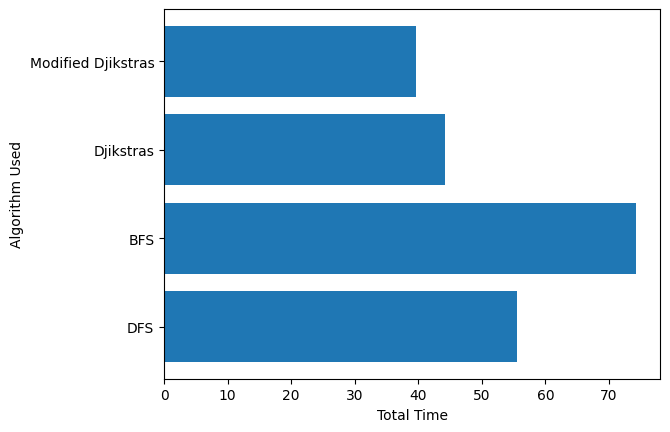

[55.49651861190796, 74.33213353157043, 44.1915180683136, 39.64674711227417]


In [32]:
timealgosumdf = pd.DataFrame({'Algorithms': algos, 'Times': timessum})

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

fig, ax = plt.subplots()

ax.barh(timealgosumdf.Algorithms, timealgosumdf.Times)
ax.set_xlabel('Total Time')
ax.set_ylabel('Algorithm Used')

plt.show()
print(timessum)

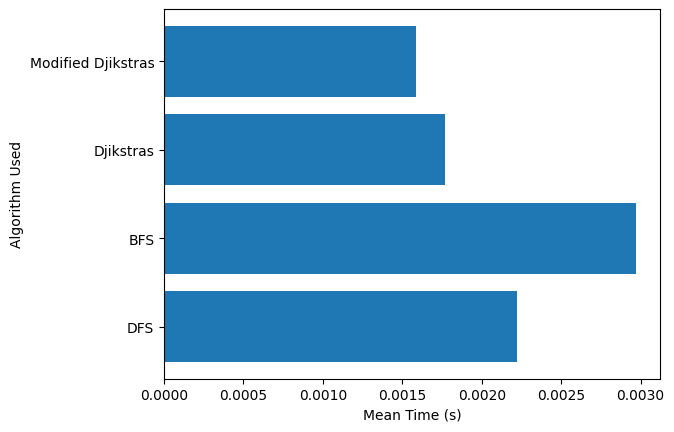

[0.0022198607444763184, 0.0029732853412628175, 0.0017676607227325438, 0.0015858698844909667]


In [33]:
timealgomeandf = pd.DataFrame({'Algorithms': algos, 'Times': timesmean})

fig, ax = plt.subplots()

ax.barh(timealgomeandf.Algorithms, timealgomeandf.Times)
ax.set_xlabel('Mean Time (s)')
ax.set_ylabel('Algorithm Used')

plt.show()
print(timesmean)

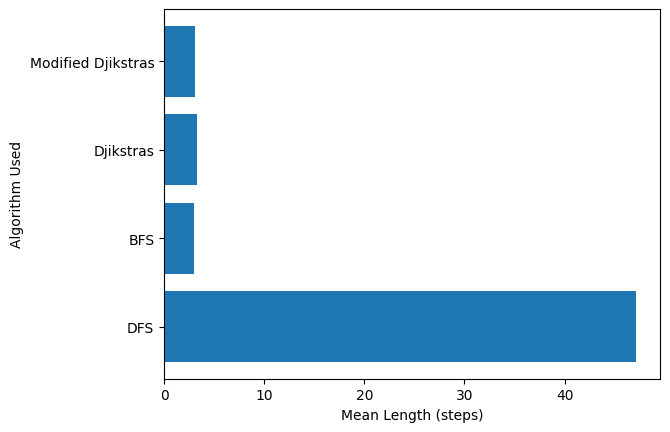

[47.17224, 3.00864, 3.267, 3.08348]


In [34]:
answersmean = [[],[],[],[]]
answersmean[0] = mean(answers[0])
answersmean[1] = mean(answers[1])
answersmean[2] = mean(answers[2])
answersmean[3] = mean(answers[3])

anslen = pd.DataFrame({'Algorithms': algos, 'Lens': answersmean})

fig, ax = plt.subplots()

ax.barh(anslen.Algorithms, anslen.Lens)
ax.set_xlabel('Mean Length (steps)')
ax.set_ylabel('Algorithm Used')

plt.show()
print(answersmean)

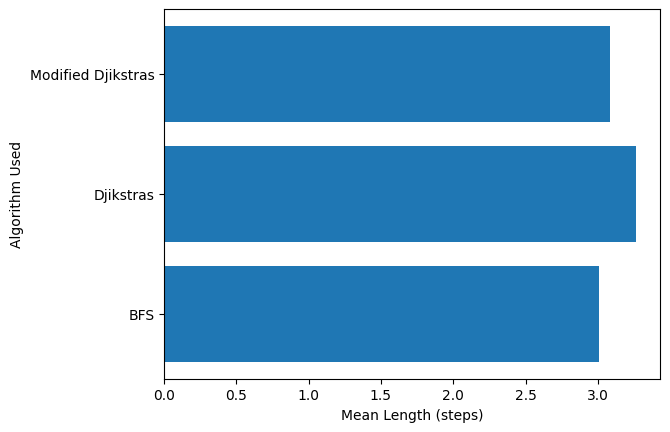

[3.00864, 3.267, 3.08348]


In [36]:
answersmean = [[],[],[]]
answersmean[0] = mean(answers[1])
answersmean[1] = mean(answers[2])
answersmean[2] = mean(answers[3])

anslen = pd.DataFrame({'Algorithms': algos[1:4], 'Lens': answersmean})

fig, ax = plt.subplots()

ax.barh(anslen.Algorithms, anslen.Lens)
ax.set_xlabel('Mean Length (steps)')
ax.set_ylabel('Algorithm Used')

plt.show()
print(answersmean)

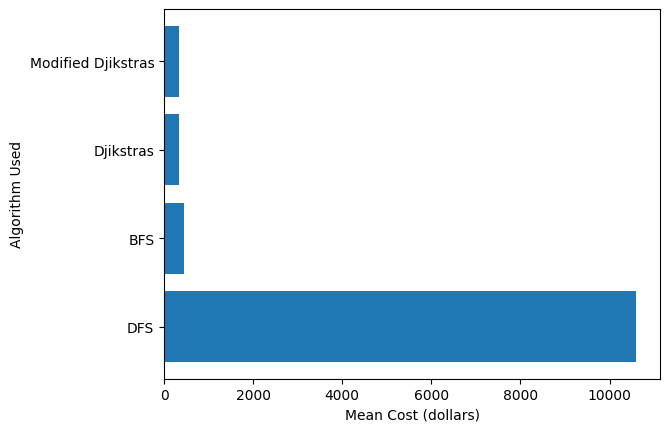

[10601.523725507386, 440.33428874712376, 333.3869023918873, 339.00206235376976]


In [41]:
costsmean = [[],[],[],[]]
costsmean[0] = mean(costs[0])
costsmean[1] = mean(costs[1])
costsmean[2] = mean(costs[2])
costsmean[3] = mean(costs[3])
costdf = pd.DataFrame({'Algorithms': algos, 'means': costsmean})

fig, ax = plt.subplots()

ax.barh(costdf.Algorithms, costdf.means)
ax.set_xlabel('Mean Cost (dollars)')
ax.set_ylabel('Algorithm Used')

plt.show()
print(costsmean)

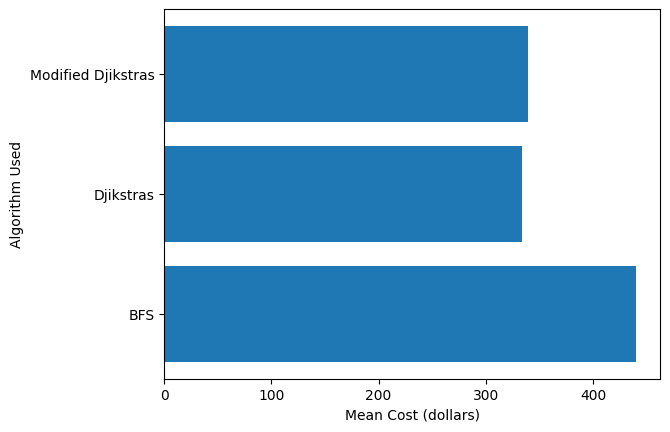

[440.33428874712376, 333.3869023918873, 339.00206235376976]


In [42]:
costsmean = [[],[],[]]
costsmean[0] = mean(costs[1])
costsmean[1] = mean(costs[2])
costsmean[2] = mean(costs[3])
costdf = pd.DataFrame({'Algorithms': algos[1:4], 'means': costsmean})

fig, ax = plt.subplots()

ax.barh(costdf.Algorithms, costdf.means)
ax.set_xlabel('Mean Cost (dollars)')
ax.set_ylabel('Algorithm Used')

plt.show()
print(costsmean)